### Part 3: Visualizations based on the book

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('../data/my_data.csv')

C:\Users\Leuro\AppData\Local\Temp\ipykernel_32480\2550562685.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/my_data.csv')


In [3]:
df.head()

,Crime_Date,Crime_Category,Time,PdDistrict,X,Y,Year
0,2004-11-22,ROBBERY,17:50,INGLESIDE,-122.420084,37.708311,2004
1,2005-10-18,VEHICLE THEFT,20:00,PARK,-120.500000,90.000000,2005
2,2004-02-15,VEHICLE THEFT,02:00,SOUTHERN,-120.500000,90.000000,2004
3,2011-02-18,ARSON,05:27,INGLESIDE,-122.436220,37.724377,2011
4,2010-11-21,ASSAULT,17:00,SOUTHERN,-122.410541,37.770913,2010


In [4]:
df["Crime_Date"] = pd.to_datetime(df["Crime_Date"])
df["Crime_Category"].unique()

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA',
       'LARCENY THEFT', 'LOST PROPERTY', 'DRUG VIOLATION',
       'MALICIOUS MISCHIEF', 'WARRANT', 'CASE CLOSURE',
       'OTHER MISCELLANEOUS', 'OTHER', 'TRAFFIC COLLISION',
       'WEAPONS CARRYING ETC', 'RAPE', 'DRUG OFFENSE',
       'MOTOR VEHICLE THEFT', 'FIRE REPORT', 'TRAFFIC VIOLATION ARREST',
       'COURTESY REPORT

In [5]:
crime_type = "VEHICLE THEFT"
mask_crime = df["Crime_Category"] == crime_type

start_date = "2004-01-01"
end_date   = "2004-06-30"
mask_dates = (df["Crime_Date"] >= start_date) & (df["Crime_Date"] <= end_date)

mask_dates.count()


np.int64(3014019)

In [6]:
filtered_df = df[mask_crime & mask_dates].copy()

filtered_df.head()

,Crime_Date,Crime_Category,Time,PdDistrict,X,Y,Year
2,2004-02-15,VEHICLE THEFT,02:00,SOUTHERN,-120.500000,90.000000,2004
198,2004-03-15,VEHICLE THEFT,11:30,NORTHERN,-122.421944,37.773037,2004
208,2004-02-08,VEHICLE THEFT,17:00,RICHMOND,-122.479520,37.774711,2004
537,2004-02-15,VEHICLE THEFT,02:00,SOUTHERN,-120.500000,90.000000,2004
774,2004-01-23,VEHICLE THEFT,13:47,SOUTHERN,-122.391472,37.789752,2004


In [7]:
def time_to_decimal_hours(time_str):
    """Convert 'HH:MM' -> float(HH + MM/60)."""
    try:
        hh, mm = time_str.split(":")
        return float(hh) + float(mm)/60
    except:
        return np.nan  # In case of malformed time

filtered_df["DecimalHour"] = filtered_df["Time"].apply(time_to_decimal_hours)

In [8]:
hour_mask = (filtered_df["DecimalHour"] >= 13.0) & (filtered_df["DecimalHour"] < 14.0)
subset_df = filtered_df[hour_mask].copy()

print("Number of records in subset:", len(subset_df))
subset_df.head()

Number of records in subset: 276


,Crime_Date,Crime_Category,Time,PdDistrict,X,Y,Year,DecimalHour
774,2004-01-23,VEHICLE THEFT,13:47,SOUTHERN,-122.391472,37.789752,2004,13.783333
2185,2004-05-14,VEHICLE THEFT,13:30,NORTHERN,-122.430139,37.799736,2004,13.500000
13649,2004-05-02,VEHICLE THEFT,13:16,TARAVAL,-122.469411,37.719710,2004,13.266667
16004,2004-04-04,VEHICLE THEFT,13:00,CENTRAL,-122.418937,37.794404,2004,13.000000
21053,2004-02-04,VEHICLE THEFT,13:15,RICHMOND,-122.470295,37.775994,2004,13.250000


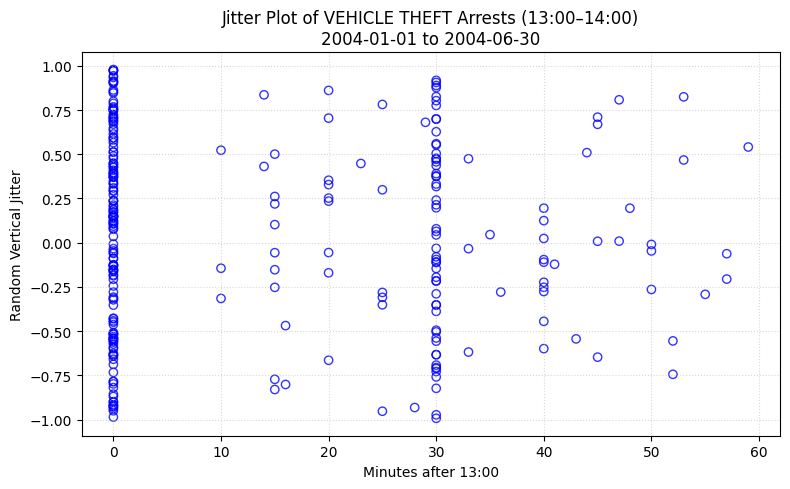

In [9]:
jitter_strength = 1  # Adjust as needed
subset_df["jitter"] = np.random.uniform(-jitter_strength, jitter_strength, len(subset_df))

# For clarity, let’s convert DecimalHour to "minutes after 13:00"
# so the x-axis runs from 0 to 60.
subset_df["MinutesAfter13"] = (subset_df["DecimalHour"] - 13.0) * 60

# ---------------------------------------------------
# PLOT
# ---------------------------------------------------
plt.figure(figsize=(8, 5))

plt.scatter(
    subset_df["MinutesAfter13"],
    subset_df["jitter"],
    marker='o',
    facecolors='none',     # hollow circles
    edgecolors='blue',
    alpha=0.8
)

plt.title(f"Jitter Plot of {crime_type} Arrests (13:00–14:00)\n"
          f"{start_date} to {end_date}")
plt.xlabel("Minutes after 13:00")
plt.ylabel("Random Vertical Jitter")

# Add a grid for readability if desired
plt.grid(True, linestyle=':', alpha=0.5)

# Tighten layout to reduce whitespace
plt.tight_layout()
plt.show()

In [10]:
crime1 = "BURGLARY"
crime2 = crime_type

# For each crime, pick a time interval that yields enough data
# (1000–10000 points as per the prompt).
# Example: Filter for crimes in 2010 to 2011
start_date = "2010-01-01"
end_date   = "2011-12-31"

mask_dates = (df["Crime_Date"] >= start_date) & (df["Crime_Date"] <= end_date)

df_c1 = df[ (df["Crime_Category"] == crime1) & mask_dates ].copy()
df_c2 = df[ (df["Crime_Category"] == crime2) & mask_dates ].copy()

print(f"{crime1} rows:", len(df_c1))
print(f"{crime2} rows:", len(df_c2))

# We focus on latitudes in df["Y"].
# Make sure latitudes look valid for SF (~37.7 area). If your data has outliers
# (like 90.0 from missing geocoding), you might want to drop them:
df_c1 = df_c1[(df_c1["Y"] > 37) & (df_c1["Y"] < 38)]
df_c2 = df_c2[(df_c2["Y"] > 37) & (df_c2["Y"] < 38)]


BURGLARY rows: 9869
VEHICLE THEFT rows: 9079


In [11]:
lat_min = min(df_c1["Y"].min(), df_c2["Y"].min())
lat_max = max(df_c1["Y"].max(), df_c2["Y"].max())

# Build 50 bins spanning from lat_min to lat_max
num_bins = 50
bins = np.linspace(lat_min, lat_max, num_bins+1)

# Calculate histogram counts for each subset
hist_c1, bin_edges = np.histogram(df_c1["Y"], bins=bins)
hist_c2, bin_edges = np.histogram(df_c2["Y"], bins=bins)

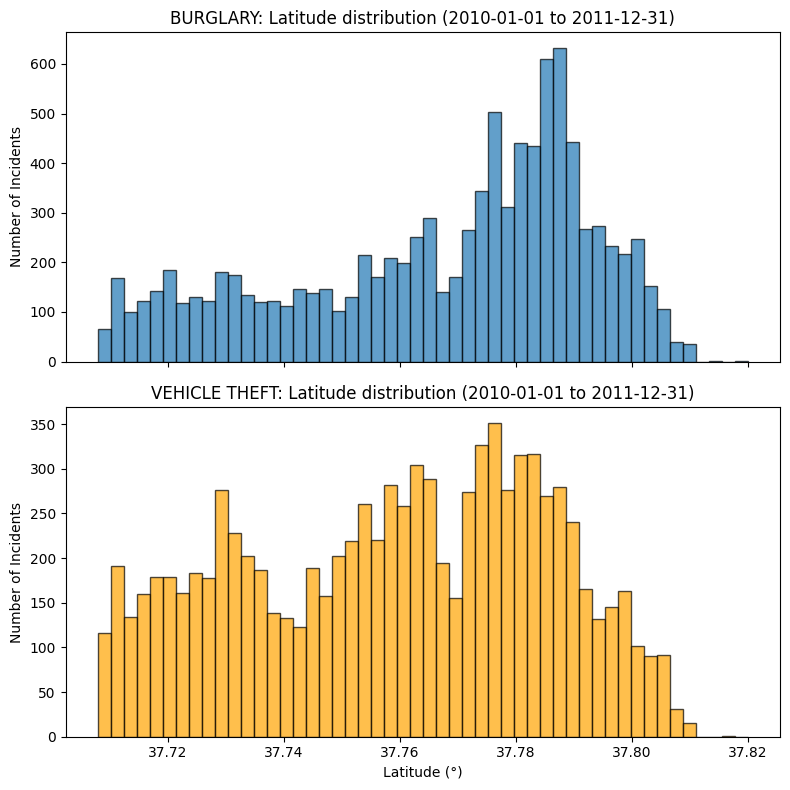

In [12]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# Prepare x-coordinates for bar plots:
# We typically place bars at midpoints of each bin.
bin_width = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges[:-1] + bin_width/2.0

# -- Subplot 1: Crime type 1
axes[0].bar(
    bin_centers,
    hist_c1,
    width=bin_width,
    edgecolor='k',    # black edge lines
    alpha=0.7
)
axes[0].set_title(f"{crime1}: Latitude distribution ({start_date} to {end_date})")
axes[0].set_ylabel("Number of Incidents")

# -- Subplot 2: Crime type 2
axes[1].bar(
    bin_centers,
    hist_c2,
    width=bin_width,
    edgecolor='k',
    color='orange',
    alpha=0.7
)
axes[1].set_title(f"{crime2}: Latitude distribution ({start_date} to {end_date})")
axes[1].set_xlabel("Latitude (°)")
axes[1].set_ylabel("Number of Incidents")

plt.tight_layout()
plt.show()

In [13]:
# Suppose df_full is your main data (1k–10k points).
# We'll sample 25 random rows from it.
df_sample = df.sample(n=25, random_state=42).copy()

print("Original dataset size:", len(df))
print("Sampled dataset size:", len(df_sample))
df_sample = df.sample(25)
df["DecimalHour"] = df["Time"].apply(time_to_decimal_hours)


Original dataset size: 3014019
Sampled dataset size: 25


In [14]:
def time_to_decimal_hours(time_str):
    hh, mm = time_str.split(":")
    return float(hh) + float(mm)/60

df["DecimalHour"] = df["Time"].apply(time_to_decimal_hours)
print(df.columns)
print(df_sample.columns.tolist())

Index(['Crime_Date', 'Crime_Category', 'Time', 'PdDistrict', 'X', 'Y', 'Year',
       'DecimalHour'],
      dtype='object')
['Crime_Date', 'Crime_Category', 'Time', 'PdDistrict', 'X', 'Y', 'Year']


In [16]:
print("Subset 1 length:", len(df_c1))
print("Subset 2 length:", len(df_c2))

Subset 1 length: 9869
Subset 2 length: 9079


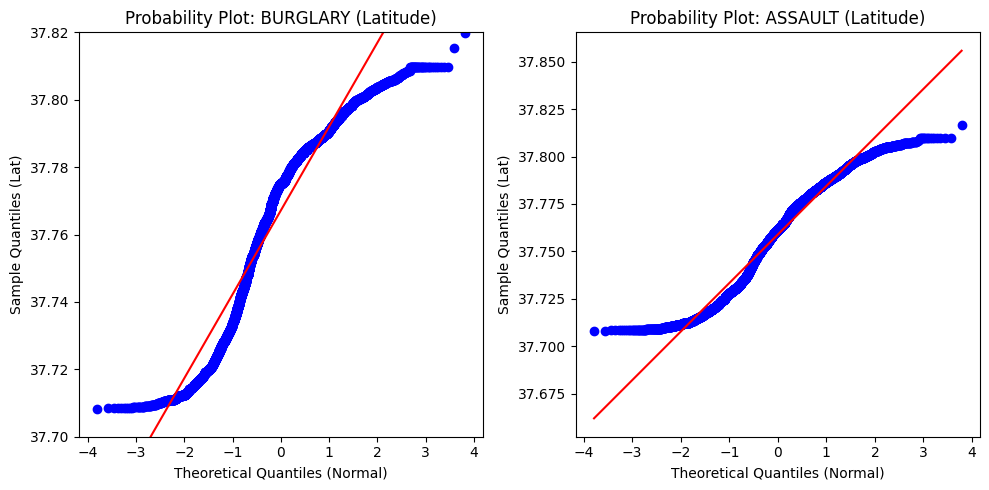

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Probability Plot 1 (Crime type 1)
stats.probplot(df_c1["Y"], dist="norm", plot=axes[0])
axes[0].set_title("Probability Plot: BURGLARY (Latitude)")
axes[0].set_xlabel("Theoretical Quantiles (Normal)")
axes[0].set_ylabel("Sample Quantiles (Lat)")
axes[0].set_ylim([37.70, 37.82])

# Probability Plot 2 (Crime type 2)
stats.probplot(df_c2["Y"], dist="norm", plot=axes[1])
axes[1].set_title("Probability Plot: ASSAULT (Latitude)")
axes[1].set_xlabel("Theoretical Quantiles (Normal)")
axes[1].set_ylabel("Sample Quantiles (Lat)")
axes[0].set_ylim([37.70, 37.82])

plt.tight_layout()
plt.show()

In [18]:
# 10 focus crimes from your set
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
    'STOLEN PROPERTY'
}

# Filter to focus crimes
df_focus = df[df["Crime_Category"].isin(focuscrimes)].copy()

df_focus.head()

,Crime_Date,Crime_Category,Time,PdDistrict,X,Y,Year,DecimalHour
0,2004-11-22,ROBBERY,17:50,INGLESIDE,-122.420084,37.708311,2004,17.833333
1,2005-10-18,VEHICLE THEFT,20:00,PARK,-120.500000,90.000000,2005,20.000000
2,2004-02-15,VEHICLE THEFT,02:00,SOUTHERN,-120.500000,90.000000,2004,2.000000
4,2010-11-21,ASSAULT,17:00,SOUTHERN,-122.410541,37.770913,2010,17.000000
5,2013-04-02,ASSAULT,15:50,TARAVAL,-122.470366,37.745158,2013,15.833333


In [19]:
daily_counts = (
    df_focus
    .groupby(["Crime_Category", "Crime_Date"])
    .size()  # or .agg({"SomeColumn": "count"})
    .reset_index(name="count")
)

# daily_counts columns: [Crime_Category, Crime_Date, count]
daily_counts.head()

,Crime_Category,Crime_Date,count
0,ASSAULT,2003-01-01,80
1,ASSAULT,2003-01-02,27
2,ASSAULT,2003-01-03,30
3,ASSAULT,2003-01-04,29
4,ASSAULT,2003-01-05,38


In [20]:
# Group the daily_counts by Crime_Category and turn each group into a list
crime_groups = (
    daily_counts
    .groupby("Crime_Category")["count"]
    .apply(list)
)

# Ensure we plot the categories in a consistent order:
ordered_categories = sorted(crime_groups.index)  # or choose a custom order

# Build the list of daily count arrays in the same order
data_for_boxplot = [crime_groups[cat] for cat in ordered_categories]

C:\Users\Leuro\AppData\Local\Temp\ipykernel_32480\3734831718.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


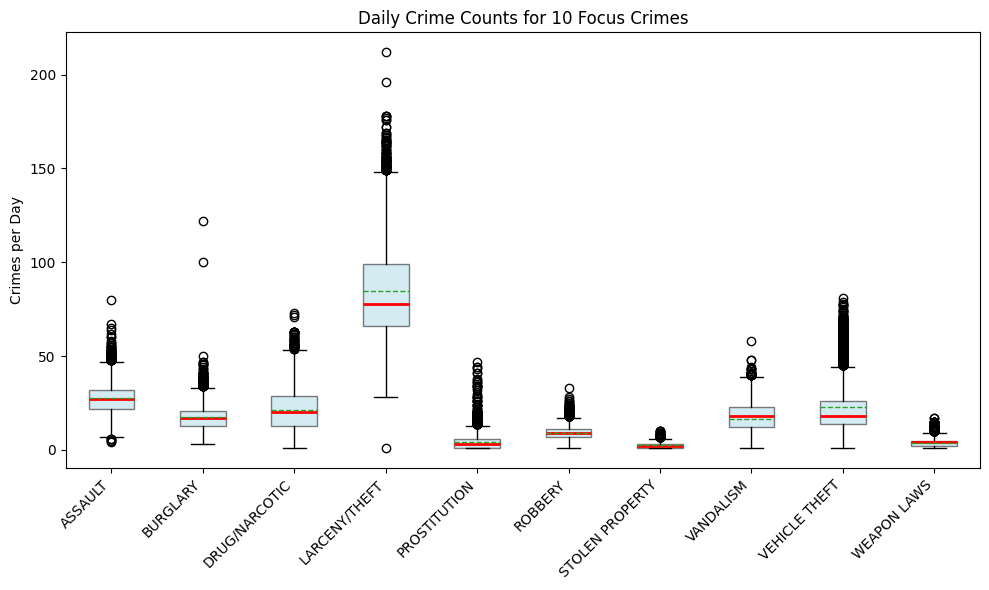

In [21]:
plt.figure(figsize=(10, 6))

# Create the box plot
# Show means explicitly, if desired; can also show meanline
box = plt.boxplot(
    data_for_boxplot,
    labels=ordered_categories,   # label each box with the category
    showmeans=True,
    meanline=True,
    patch_artist=True,           # so we can style box colors
    boxprops=dict(facecolor="lightblue", alpha=0.5),
    medianprops=dict(color="red", linewidth=2),
)

plt.title("Daily Crime Counts for 10 Focus Crimes")
plt.ylabel("Crimes per Day")
plt.xticks(rotation=45, ha="right")  # rotate x-labels for readability

plt.tight_layout()
plt.show()

In [22]:
# Define the category to remove
category_to_remove = "LARCENY/THEFT"

# Create a new DataFrame without the specified category
df_filtered = df_focus[df_focus["Crime_Category"] != category_to_remove]

daily_counts = (
    df_filtered
    .groupby(["Crime_Category", "Crime_Date"])
    .size()  # or .agg({"SomeColumn": "count"})
    .reset_index(name="count")
)

# daily_counts columns: [Crime_Category, Crime_Date, count]
daily_counts.head()

# Group the daily_counts by Crime_Category and turn each group into a list
crime_groups = (
    daily_counts
    .groupby("Crime_Category")["count"]
    .apply(list)
)

# Ensure we plot the categories in a consistent order:
ordered_categories = sorted(crime_groups.index)  # or choose a custom order

# Build the list of daily count arrays in the same order
data_for_boxplot = [crime_groups[cat] for cat in ordered_categories]


C:\Users\Leuro\AppData\Local\Temp\ipykernel_32480\2233612689.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


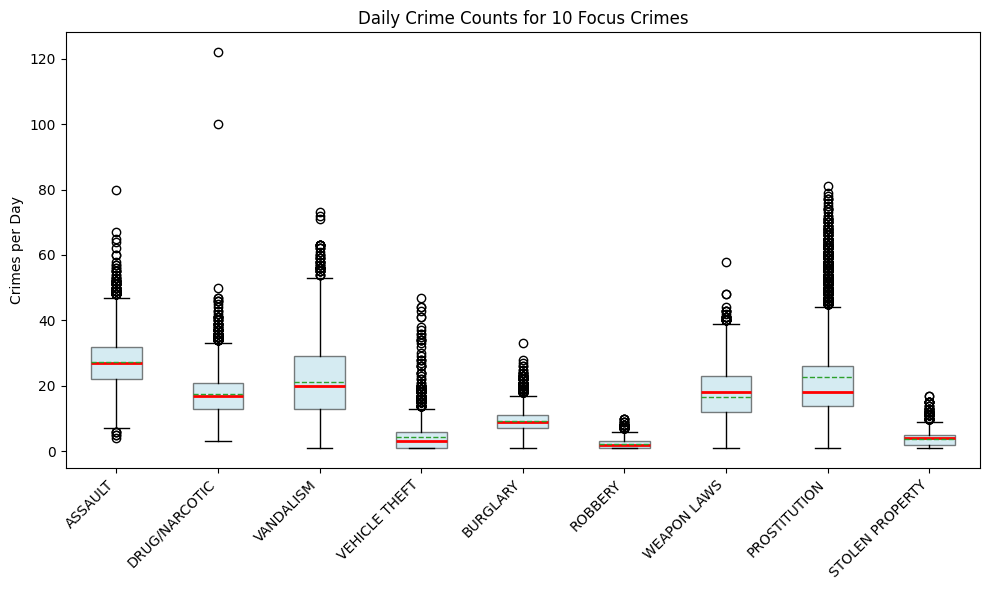

In [23]:
# Sort categories by median daily count
medians = daily_counts.groupby("Crime_Category")["count"].median()
ordered_categories = medians.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

# Create the box plot
# Show means explicitly, if desired; can also show meanline
box = plt.boxplot(
    data_for_boxplot,
    labels=ordered_categories,   # label each box with the category
    showmeans=True,
    meanline=True,
    patch_artist=True,           # so we can style box colors
    boxprops=dict(facecolor="lightblue", alpha=0.5),
    medianprops=dict(color="red", linewidth=2),
)

plt.title("Daily Crime Counts for 10 Focus Crimes")
plt.ylabel("Crimes per Day")
plt.xticks(rotation=45, ha="right")  # rotate x-labels for readability

plt.tight_layout()
plt.show()

In [24]:
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'VANDALISM', 'VEHICLE THEFT',
    'STOLEN PROPERTY'
}

# 1) Filter to focus crimes
df_focus = df[df["Crime_Category"].isin(focuscrimes)].copy()

# 2) Parse the Time string
def time_to_decimal_hour(t_str):
    """
    Convert 'HH:MM' (or 'HH:MM:SS') to decimal hours.
    Example: '10:15' -> 10.25
             '8:40'  -> 8.67 (approx)
    """
    parts = t_str.split(":")
    if len(parts) < 2:
        return None  # or np.nan
    hh = int(parts[0])
    mm = int(parts[1])
    ss = int(parts[2]) if len(parts) == 3 else 0
    return hh + mm/60 + ss/3600

df_focus["DecimalHour"] = df_focus["Time"].apply(time_to_decimal_hour)

# It's wise to drop any rows that fail to parse
df_focus.dropna(subset=["DecimalHour"], inplace=True)

In [25]:
# 3) Group times by crime category
grouped_times = (
    df_focus
    .groupby("Crime_Category")["DecimalHour"]
    .apply(list)
)

# Sort categories alphabetically or by median time, whichever you prefer
ordered_categories = sorted(grouped_times.index)

# 4) Build the list of lists
data_for_boxplot = [grouped_times[cat] for cat in ordered_categories]

C:\Users\Leuro\AppData\Local\Temp\ipykernel_32480\1160509933.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


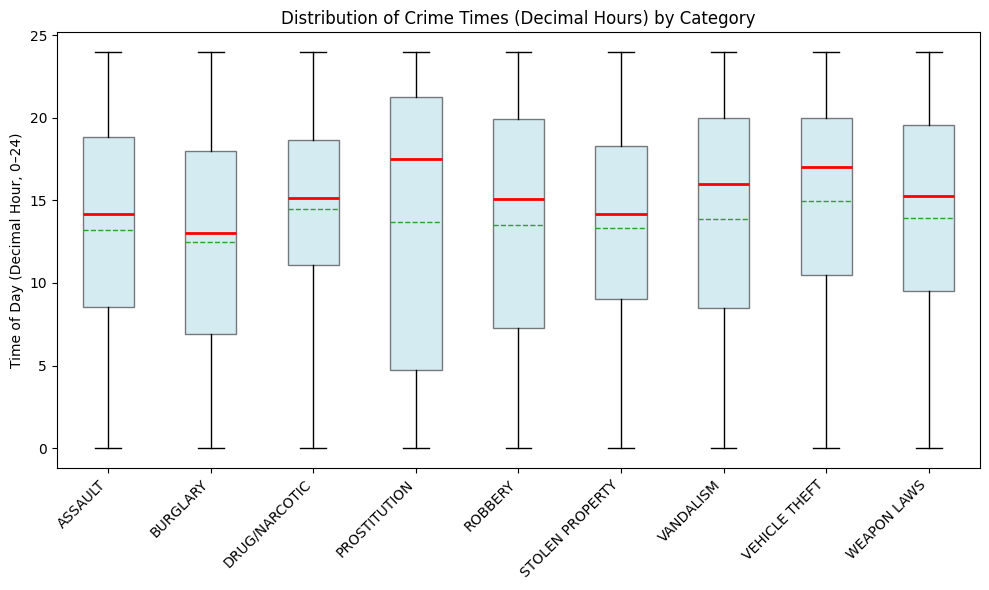

In [26]:
plt.figure(figsize=(10, 6))

box = plt.boxplot(
    data_for_boxplot,
    labels=ordered_categories,
    showfliers=True,    # show outliers
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.5),
    medianprops=dict(color='red', linewidth=2)
)

plt.title("Distribution of Crime Times (Decimal Hours) by Category")
plt.ylabel("Time of Day (Decimal Hour, 0–24)")
plt.xticks(rotation=45, ha="right")  # so labels don't overlap

plt.tight_layout()
plt.show()


In [27]:
import urllib.request

# Dictionary holding local filenames (keys) and the corresponding URLs (values)
files_to_download = {
    "data": "https://raw.githubusercontent.com/suneman/socialdata2025/main/files/sfpd.geojson",
}

for local_filename, url in files_to_download.items():
    urllib.request.urlretrieve(url, local_filename)
    print(f"Downloaded {local_filename} from {url}")

Downloaded data from https://raw.githubusercontent.com/suneman/socialdata2025/main/files/sfpd.geojson


In [28]:
import json
import pandas as pd
import plotly.express as px
import geopandas as gpd


gdf = gpd.read_file("data")
# Convert to GeoJSON (must reproject to WGS84 if not already)
gdf = gdf.to_crs(epsg=4326)
sfpd_geojson = json.loads(gdf.to_json())

# Confirm the column name used for the district
print(gdf.columns)        # should include "DISTRICT"
print(gdf["DISTRICT"])    # see actual names

Index(['id', 'OBJECTID', 'DISTRICT', 'COMPANY', 'geometry'], dtype='object')
0       CENTRAL
1      SOUTHERN
2       BAYVIEW
3       MISSION
4          PARK
5      RICHMOND
6     INGLESIDE
7       TARAVAL
8      NORTHERN
9    TENDERLOIN
Name: DISTRICT, dtype: object


In [29]:
randomdata = {
    'CENTRAL': 0.4821,
    'SOUTHERN': 0.9153,
    'BAYVIEW': 0.3674,
    'MISSION': 0.7542,
    'PARK': 0.6285,
    'RICHMOND': 0.2147,
    'INGLESIDE': 0.05391,
    'TARAVAL': 0.007846,
    'NORTHERN': 0.4938,
    'TENDERLOIN': 0.08127
}
df_random = pd.DataFrame(
    {"DISTRICT": list(randomdata.keys()), 
     "randomval": list(randomdata.values())}
)

df_random

,DISTRICT,randomval
0,CENTRAL,0.482100
1,SOUTHERN,0.915300
2,BAYVIEW,0.367400
3,MISSION,0.754200
4,PARK,0.628500
5,RICHMOND,0.214700
6,INGLESIDE,0.053910
7,TARAVAL,0.007846
8,NORTHERN,0.493800
9,TENDERLOIN,0.081270


In [30]:
fig = px.choropleth_map(
    df_random,
    geojson=sfpd_geojson,
    locations="DISTRICT",              # matches df_random column
    featureidkey="properties.DISTRICT",# matches shapefile property
    color="randomval",
    color_continuous_scale="Viridis",
    range_color=(0, 1),                # your data is in [0,1]-ish
    map_style="carto-positron",
    zoom=11,                           # zoom in on SF
    center={"lat": 37.77, "lon": -122.44},
    opacity=0.6,
    labels={"randomval": "Random Score"}
)

# Remove white margins
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [33]:
df['Weekday'] = df['Crime_Date'].dt.day_name()

df['Weekday'].head()

0     Monday
1    Tuesday
2     Sunday
3     Friday
4     Sunday
Name: Weekday, dtype: object

In [34]:
crime_of_interest = "VEHICLE THEFT"
mask = (
    (df["Weekday"] == "Sunday") &
    (df["Crime_Category"] == crime_of_interest)
)
df_sunday_thefts = df[mask].copy()

# 2) Group by District, count the incidents
df_count = (
    df_sunday_thefts
    .groupby("PdDistrict", dropna=False)
    .size()                # counts rows in each group
    .reset_index(name="counts")
)

# Quick look at the aggregated result:
print(df_count)
# Example columns: [PdDistrict, counts]

   PdDistrict  counts
0     BAYVIEW    2297
1     CENTRAL    1482
2   INGLESIDE    2825
3     MISSION    2367
4    NORTHERN    1983
5        PARK    1320
6    RICHMOND    1358
7    SOUTHERN    1540
8     TARAVAL    1928
9  TENDERLOIN     353


In [37]:
from shapely.geometry import Point

df_sunday = df_sunday_thefts.dropna(subset=["PdDistrict", "X", "Y"])  # remove invalids

# Make a GeoDataFrame from the points
geometry = [Point(lon, lat) for lon, lat in zip(df_sunday["X"], df_sunday["Y"])]
gdf_sunday = gpd.GeoDataFrame(df_sunday, geometry=geometry, crs="EPSG:4326")

In [39]:
district_polygons = []

# Group all Sunday points by PdDistrict
for dist_name, group_df in gdf_sunday.groupby("PdDistrict"):
    # Combine all points in this district
    # group_df.geometry is a list of Shapely Points
    # unary_union merges them into one geometry collection
    # .convex_hull turns it into the minimal polygon
    union_of_points = group_df.geometry.union_all()
    hull_shape = union_of_points.convex_hull  # "alpha_shape" is more advanced

    # Store a record in a list
    district_polygons.append({
        "PdDistrict": dist_name,
        "geometry": hull_shape
    })

# Turn that into a new GeoDataFrame
hulls_gdf = gpd.GeoDataFrame(district_polygons, crs="EPSG:4326")

In [40]:
hulls_gdf.to_file("SFPD_Districts_approx.geojson", driver="GeoJSON")

In [44]:
# Load the new approximate district polygons
with open("SFPD_Districts_approx.geojson", "r") as f:
    approx_geojson = json.load(f)

sfpd_geojson["features"][0]["properties"]["DISTRICT"] #might be "CENTRAL", "MISSION", etc.

fig = px.choropleth_map(
    df_count,
    geojson=sfpd_geojson,
    locations="PdDistrict",             # from df_count
    featureidkey="properties.DISTRICT", # from geojson
    color="counts",                     # color by number of Sunday thefts
    color_continuous_scale="Reds",      # pick a color scale, e.g. "Reds"
    # The number of Sunday thefts might range from 0 to, say, 300
    range_color=(0, df_count["counts"].max()),
    map_style="carto-positron",
    zoom=11,
    center={"lat": 37.77, "lon": -122.44},  # approximate center for SF
    opacity=0.6,
    labels={"counts": "Sunday Vehicle Thefts"}
)

# You can add a descriptive title
fig.update_layout(
    title=f"Sunday {crime_of_interest}s by SFPD District",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()